In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [8]:
df = pd.read_csv('data/encoded_playlist_songs.csv')
df_fav = pd.read_csv('data/favorite_songs.csv')

In [9]:
df.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,7MAibcTli4IisCtbHKrGMh,242096,90,0.586,0.1820,0.616,0.000000,0.0927,-7.964,0.0324,148.088,4,0
1,5QO79kh1waicV47BqGRL3g,215626,97,0.680,0.0212,0.826,0.000012,0.5430,-5.487,0.0309,118.051,4,0
2,1diS6nkxMQc3wwC4G1j0bh,165506,88,0.722,0.0319,0.588,0.000000,0.1830,-5.932,0.0544,134.010,4,0
3,4u4NyuceXP7Uzh7XFJKCr1,170813,89,0.658,0.0106,0.634,0.000000,0.1320,-5.797,0.0413,139.980,4,0
4,3Ofmpyhv5UAQ70mENzB277,132780,94,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,0


In [10]:
df_fav.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,5Z2MiIZ5I3jJvvmeWMLbOQ,272373,89,0.538,0.1380,0.742,0.000047,0.0934,-5.355,0.1140,96.107,4,1
1,3OHfY25tqY28d16oZczHc8,153946,92,0.644,0.0543,0.728,0.169000,0.1610,-5.750,0.0351,88.993,4,1
2,3EPXxR3ImUwfayaurPi3cm,196373,75,0.553,0.6970,0.586,0.000000,0.0813,-6.319,0.0362,126.684,4,1
3,63mdJr3NMY3wReOkNE6c6W,194900,75,0.695,0.0881,0.620,0.000054,0.1110,-8.082,0.0521,150.032,4,1
4,0j1Ia2lQWrcXrQZI4AdJlk,184638,73,0.648,0.8860,0.308,0.077400,0.1240,-11.729,0.0400,76.997,1,1


In [11]:
# Remove song name, artist, album
df = pd.concat([df, df_fav], axis=0)
df.shape

(8933, 13)

In [12]:
df['favorite'].value_counts()

0    8883
1      50
Name: favorite, dtype: int64

# Data Prep Contd, Model Selection & Hyperparameter Tuning

In [13]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [14]:
# Shuffle your dataset 
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(df))

# Split dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [15]:
train_set.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
3550,4yaCHxeYqYqrdYLf4gT78t,173613,29,0.674,0.083800,0.540,0.01750,0.137,-9.536,0.0675,77.102,4,0
3925,7LMlFOPZDOhwluPF20bnE5,218837,45,0.565,0.553000,0.572,0.00154,0.179,-7.635,0.0356,107.305,4,0
2945,6QfnvcOKsdN4Q6exUWVuzn,244480,65,0.568,0.041100,0.835,0.00000,0.357,-6.896,0.0687,170.045,4,0
1171,4ha8tJppoKhJPd2QIYnINX,193103,47,0.535,0.127000,0.601,0.00000,0.132,-9.845,0.3780,84.948,4,0
5486,6EoRwgedzl5b26maxfd0Bt,199680,48,0.842,0.000942,0.684,0.02480,0.111,-7.750,0.0562,124.984,4,0


In [16]:
X=train_set.drop(columns=['favorite','track_id'])
Y=train_set.favorite

In [17]:
X.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
3550,173613,29,0.674,0.083800,0.540,0.01750,0.137,-9.536,0.0675,77.102,4
3925,218837,45,0.565,0.553000,0.572,0.00154,0.179,-7.635,0.0356,107.305,4
2945,244480,65,0.568,0.041100,0.835,0.00000,0.357,-6.896,0.0687,170.045,4
1171,193103,47,0.535,0.127000,0.601,0.00000,0.132,-9.845,0.3780,84.948,4
5486,199680,48,0.842,0.000942,0.684,0.02480,0.111,-7.750,0.0562,124.984,4


In [18]:
Y.shape

(7146,)

In [19]:
Y.value_counts()

0    7102
1      44
Name: favorite, dtype: int64

In [20]:
# Train / Split Data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X, Y) 

In [21]:
X_train.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,173613,29,0.674,0.083800,0.540,0.01750,0.137,-9.536,0.0675,77.102,4
1,218837,45,0.565,0.553000,0.572,0.00154,0.179,-7.635,0.0356,107.305,4
2,244480,65,0.568,0.041100,0.835,0.00000,0.357,-6.896,0.0687,170.045,4
3,193103,47,0.535,0.127000,0.601,0.00000,0.132,-9.845,0.3780,84.948,4
4,199680,48,0.842,0.000942,0.684,0.02480,0.111,-7.750,0.0562,124.984,4


In [22]:
y_train.value_counts()

0    7102
1    7102
Name: favorite, dtype: int64

In [23]:
test_set.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
4442,4oRDt0qQeY4XQOQWYOQUmt,275106,40,0.748,0.003480,0.7990,0.000002,0.103,-9.322,0.0438,105.569,4,0
2799,16vXR0dOUTYtz5OtkXKFkT,226293,0,0.371,0.000674,0.8380,0.000009,0.202,-5.534,0.0617,177.494,4,0
91,2Y3USTCETS4xbjJOzT1Icm,176382,77,0.921,0.217000,0.7180,0.000000,0.189,-3.545,0.2990,141.060,4,0
8240,47J2TBfDpGQUfHkErP78Tw,143466,52,0.328,0.923000,0.2930,0.030200,0.134,-14.610,0.0295,77.476,3,0
6580,4Wm2MlcN6f3XnGIm1TM5pQ,253960,20,0.467,0.801000,0.0365,0.026800,0.285,-29.199,0.0337,98.592,4,0


In [25]:
# Setting test datasets
X_test = test_set.drop(columns=['favorite', 'track_id'])
y_test = test_set['favorite']

In [26]:
X_test.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
4442,275106,40,0.748,0.003480,0.7990,0.000002,0.103,-9.322,0.0438,105.569,4
2799,226293,0,0.371,0.000674,0.8380,0.000009,0.202,-5.534,0.0617,177.494,4
91,176382,77,0.921,0.217000,0.7180,0.000000,0.189,-3.545,0.2990,141.060,4
8240,143466,52,0.328,0.923000,0.2930,0.030200,0.134,-14.610,0.0295,77.476,3
6580,253960,20,0.467,0.801000,0.0365,0.026800,0.285,-29.199,0.0337,98.592,4


In [27]:
y_test.value_counts()

0    1781
1       6
Name: favorite, dtype: int64

# Testing Models

In [29]:
%%time
# Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
print(np.mean(lr_scores))

0.8773953892319417
CPU times: total: 766 ms
Wall time: 935 ms


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


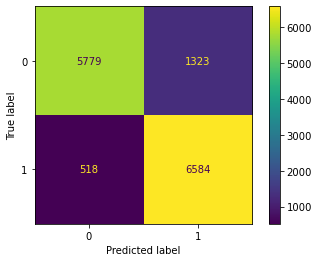

In [30]:
# Logistic Regression confusion matrix
lr_preds = lr.predict(X_train)
plot_confusion_matrix(lr, X_train, y_train)

In [31]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[3, 4, 5, 6, 10, 15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 30}

In [32]:
%%time
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

CPU times: total: 2.17 s
Wall time: 2.78 s


0.9902560676849037

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


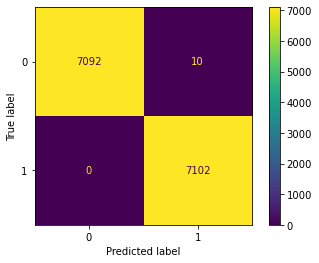

In [33]:
# Decision Tree Classifier confusion matrix
plot_confusion_matrix(dt, X_train, y_train)

In [34]:
%%time
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[3, 6,12,15,20],
    'n_estimators':[10, 20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

CPU times: total: 21.9 s
Wall time: 27.7 s


{'max_depth': 20, 'n_estimators': 10}

In [35]:
%%time
# RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 10, max_depth = 20).fit(X_train, y_train))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

CPU times: total: 3.36 s
Wall time: 4.42 s


0.9934198839794544

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


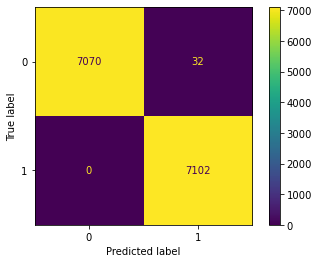

In [38]:
plot_confusion_matrix(rf, X_train, y_train)

Using DecisionTreeClassifier for recommendation algorithm

In [39]:
# Checking for imbalance
y_test.value_counts()

0    1781
1       6
Name: favorite, dtype: int64

In [40]:
# Building a pipeline to use on regular data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=30))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=30))])

pipe.score(X_test, y_test)

0.9865696698377169

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


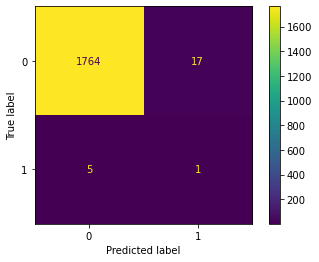

In [41]:
plot_confusion_matrix(dt, X_test, y_test)

# Predicting Songs

In [53]:
# Reloading the original dataframe to test the model on
df = pd.read_csv('data/encoded_playlist_songs.csv')
df.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,7MAibcTli4IisCtbHKrGMh,242096,90,0.586,0.1820,0.616,0.000000,0.0927,-7.964,0.0324,148.088,4,0
1,5QO79kh1waicV47BqGRL3g,215626,97,0.680,0.0212,0.826,0.000012,0.5430,-5.487,0.0309,118.051,4,0
2,1diS6nkxMQc3wwC4G1j0bh,165506,88,0.722,0.0319,0.588,0.000000,0.1830,-5.932,0.0544,134.010,4,0
3,4u4NyuceXP7Uzh7XFJKCr1,170813,89,0.658,0.0106,0.634,0.000000,0.1320,-5.797,0.0413,139.980,4,0
4,3Ofmpyhv5UAQ70mENzB277,132780,94,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,0


In [54]:
# Predicting if a song is a favorite
prob_preds = pipe.predict_proba(df.drop(['favorite','track_id'], axis=1))
threshold = 0.50 # define threshold here
preds = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]
df['prediction'] = preds

In [55]:
df['prediction'].value_counts()

0    8864
1      19
Name: prediction, dtype: int64

In [56]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2

In [57]:
cid = '84a918187a0d4fc5a66dd8e062fff899'
secret = '9f4fea70be164dd7bb5ffcf653b33d29'
redirect_uri='http://localhost:8080/callback/'
username = 'egtrwnupl4nlhpsxae4aecqno'

In [58]:
scope = 'user-top-read playlist-modify-private playlist-modify-public'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [59]:
# Creating a function that builds a playlist in the user's spotify account
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)

In [60]:
create_playlist(sp, username, 'Recommended songs', 'This playlist was created using python!')

In [61]:
# Function to check if the playlist was created successfully
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [62]:
fetch_playlists(sp,username)

,id,name,#tracks
0,43P05htYppP9MFDW8bShiZ,Recommended songs,0
1,34wFlrH2OfxNdgLyOx4sTo,The Hills,5
2,6u5TNTlZ6YtUIT01f3NsIT,fuzzed up,30
3,3kjYCGSOvB1V6jPMmu1W6b,cryitout,85
4,36T3nuiYYF7NMOpe0ZWRy1,My top tracks(experimental),50
5,5dNorCu0C8UlF2sK3cA1Tf,aasmaan,24
6,6mzqE0K2v1e3hTXC9lwokF,random,9
7,5qFMP93j18L5TZVuPp19d8,to be<3,94
8,5pq0ceDjpbHIpLk1CSAuUq,playLIT,285
9,3gAVHi7zmjlVmeaCpg0hUb,butterflies,34


In [63]:
# Getting the playlist ID of the most recently made playlist so we can add songs to it later
playlist_id = fetch_playlists(sp,username)['id'][0]

In [64]:
# Function to add selected songs to playlist
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []
    
    while index < len(playlist_tracks):
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + 50])
        index += 50

In [65]:
# Adding songs to playlist
list_track = df.loc[df['prediction']  == 1]['track_id']
enrich_playlist(sp, username, playlist_id, list_track)

Playlist link: https://open.spotify.com/playlist/43P05htYppP9MFDW8bShiZ?si=0aad5e201deb4316